# In this code, we will implement the developed ANNs for DOMAIN ADOPTATION of a new DATA set (e.g.,Field data set)

To do this, first we will conduct domain adoptation.

In order to predeict the datasets that ANN has not trained with them, it is highly suggested to use a part of new dataset to retrain the developed ANN model.
For detailed information refer to: [https://en.wikipedia.org/wiki/Domain_adaptation](https://)



# **Package Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DEFINE PACKAGES IMPORT
import os
import sys
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv
random.seed(2)
random_state = 2

**First step: Data loading**

In [ ]:
# Data loading
path = '/content/drive/MyDrive/Fatone_Water/'   # for reminding whta was the path
New_xls = pd.ExcelFile(path+'Domain Adoptation Data.xlsx')
OutputName        = input('please enter the NAME of the output(BOD,COD,TSS) = ')
InputNum          = int(input('please enter the NUMBER of input parameters(6 OR 11) = '))

NewData = pd.read_excel(New_xls,0,header=1)      

if OutputName.lower() == 'BOD'.lower(): #.lower() converts the uppercase characters into lowercase
   Output_num=1
elif OutputName.lower() == 'COD'.lower():
   Output_num=2;
elif OutputName.lower() == 'TSS'.lower():
   Output_num=3;

if InputNum == 11:
   X_New = NewData.iloc[:,0:-3] 
elif InputNum == 6:
   X_New = NewData.iloc[:,[0,1,4,5,6,7]]
   
index = Output_num -3  
T_New = NewData.iloc[:,index-1]

please enter the NAME of the output(BOD,COD,TSS) = BOD
please enter the NUMBER of input parameters(6 OR 11) = 11


In [ ]:
X_New

,Influent Flow (t),Influent pH(t),Influent NNH4(t),Influent PPO4(t),Biofor DN Temperature (t+1),Biofor CN - Dissolved oxygen (t+2),Effluent Flow (t+4),Effluent pH (t+4),Effluent NNH4 (t+4),Effluent NNOx (t+4),Effluent PPO4 (t+4)
0,99286.87003,7.730003,21.3564,1.825,24.3907,4.795030,87171.30790,6.996148,0.575145,7.949296,0.972590
1,100365.94200,7.729933,21.1848,1.820,24.1695,4.926313,83430.10958,6.996303,0.542596,7.884140,0.977507
2,98026.36921,7.729999,20.7480,1.800,23.6718,5.030749,81897.06456,6.995678,0.536022,7.822969,0.983040
3,93564.30887,7.729997,20.1396,1.760,23.6534,5.125150,82798.26232,6.994478,0.547671,7.808979,0.987710
4,88666.62790,7.730013,19.3986,1.715,23.5880,5.185821,85486.21702,6.992929,0.573152,7.842315,0.989736
...,...,...,...,...,...,...,...,...,...,...,...
768,89828.04675,7.799989,12.8700,0.790,24.9283,5.969281,78724.24975,7.104006,0.328876,4.211106,0.348489
769,90804.31814,7.799977,12.7296,0.790,25.0071,6.011194,75339.46647,7.103651,0.316795,4.179997,0.351554
770,88687.63083,7.799985,12.4722,0.785,25.0437,6.072364,73952.47100,7.102411,0.317654,4.154966,0.354859
771,84650.66034,7.799953,12.1446,0.775,25.0474,6.136012,74767.81380,7.100577,0.329510,4.162979,0.356896


In [ ]:
T_New

0      4.132170
1      4.059229
2      4.027471
3      4.044143
4      4.099901
         ...   
768    3.458701
769    3.411018
770    3.383006
771    3.383161
772    3.402263
Name: Effluent BOD (t+4), Length: 773, dtype: float64

In [ ]:
# Save the inputs and Target of NEW DATA in a folder
pd.DataFrame(X_New).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/Inputs.xlsx')
pd.DataFrame(T_New).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/Target.xlsx')

In [ ]:
#SPLIT AND SCALE DATA
# y_train: train_target    y_train_ANN: the outputs of ANN for train dataset
# y_test:  test_target
# y_val:   val_target
x_tv_New, x_test_New, y_tv_New, y_test_New = train_test_split(X_New, T_New, test_size=0.25, shuffle= True, random_state = random_state)
x_train_New, x_valid_New, y_train_New, y_valid_New = train_test_split(x_tv_New, y_tv_New, test_size=0.20, shuffle= True, random_state = random_state)
print(x_train_New.shape, x_valid_New.shape, x_test_New.shape)

# Transform
ss = StandardScaler()
ss.fit(x_train_New)   # This line: use the train inputs mean and std to make all the data standard
x_train_New_scaled = ss.transform(x_train_New)
x_valid_New_scaled = ss.transform(x_valid_New)
x_test_New_scaled  = ss.transform(x_test_New)

# Saving extracted data
x_train_New.to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/x_train_New.xlsx')
x_valid_New.to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/x_valid_New.xlsx')
x_test_New.to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/x_test_New.xlsx')

y_train_New.to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/y_train_New.xlsx')
y_valid_New.to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/y_valid_New.xlsx')
y_test_New.to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/y_test_New.xlsx')

pd.DataFrame(x_train_New_scaled).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/x_train_New_scaled.xlsx')
pd.DataFrame(x_test_New_scaled).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/x_test_New_scaled.xlsx')
pd.DataFrame(x_valid_New_scaled).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/x_valid_New_scaled.xlsx')

(463, 11) (116, 11) (194, 11)


# **Domain Adoptation**

# Recalling the developed ANN (considering output name and input numbers)

# Domain Adoptation (Re-traing the ANN using NEW data)

In [ ]:
from tensorflow.keras.models import load_model
es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
Recalled_ANN_model = load_model(path + OutputName +' results/' + str(InputNum) +' input parameters/ANN_'+OutputName+'_'+ str(InputNum)+' Inputs')
Recalled_ANN_model.fit(x_train_New_scaled, y_train_New, validation_data = (x_valid_New_scaled,y_valid_New), epochs=500, batch_size=10, verbose=True, callbacks=[es])

#Save Re-trained model
Recalled_ANN_model.save(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/ANN_New_'+OutputName+'_'+ str(InputNum)+' Inputs' )

Epoch 1/500
47/47 [==============================] - 1s 6ms/step - loss: 0.7655 - mean_absolute_error: 0.6463 - val_loss: 0.3811 - val_mean_absolute_error: 0.4641
Epoch 2/500
47/47 [==============================] - 0s 3ms/step - loss: 0.2400 - mean_absolute_error: 0.3948 - val_loss: 0.2679 - val_mean_absolute_error: 0.3839
Epoch 3/500
47/47 [==============================] - 0s 3ms/step - loss: 0.1749 - mean_absolute_error: 0.3270 - val_loss: 0.2301 - val_mean_absolute_error: 0.3387
Epoch 4/500
47/47 [==============================] - 0s 3ms/step - loss: 0.1513 - mean_absolute_error: 0.2987 - val_loss: 0.2063 - val_mean_absolute_error: 0.3122
Epoch 5/500
47/47 [==============================] - 0s 3ms/step - loss: 0.1198 - mean_absolute_error: 0.2592 - val_loss: 0.1802 - val_mean_absolute_error: 0.2879
Epoch 6/500
47/47 [==============================] - 0s 3ms/step - loss: 0.1017 - mean_absolute_error: 0.2412 - val_loss: 0.1601 - val_mean_absolute_error: 0.2665
Epoch 7/500
47/47 [===

# **Evaluating the accuracy of the developed ANN network for train, validation, and test dataset**
We have Inputs (11 inputs or 6 inputs) and Outputs (BOD, COD, or TSS)

**Outputs can be Observed (real) values: known as TARGET outputs**

**Outputs can be ANN Predicted values: known as ANN outputs**

In [ ]:
# Evaluating the ANN accuracy for train outputs
# y_train refers to the TARGET outputs of train dataset; the same for y_valid and y_test
# y_train_ANN refers to the ANN predicted outputs of train dataset; the same for y_valid_ANN and y_test_ANN

y_train_New_ANN = Recalled_ANN_model.predict(x_train_New_scaled).flatten()
y_valid_New_ANN = Recalled_ANN_model.predict(x_valid_New_scaled).flatten()
y_test_New_ANN  = Recalled_ANN_model.predict(x_test_New_scaled).flatten()

# Save the ANN predictions into the folder 
pd.DataFrame(y_train_New_ANN).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/y_train_New_ANN.xlsx')
pd.DataFrame(y_valid_New_ANN).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/y_valid_New_ANN.xlsx')
pd.DataFrame(y_test_New_ANN).to_excel(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/y_test_New_ANN.xlsx')


CC_train_New    = pearsonr(y_train_New,y_train_New_ANN)   #it should be the same thing of MATLAB 'corr' 
RMSE_train_New  = sqrt(mean_squared_error(y_train_New,y_train_New_ANN))
SI_train_New   = sqrt(mean_squared_error(y_train_New,y_train_New_ANN))/np.mean(y_train_New)
BIAS_train_New  = np.sum(y_train_New_ANN - y_train_New)/y_train_New.shape[0]

CC_test_New     = pearsonr(y_test_New,y_test_New_ANN)   #it should be the same thing of MATLAB 'corr' 
RMSE_test_New   = sqrt(mean_squared_error(y_test_New,y_test_New_ANN))
SI_test_New     = sqrt(mean_squared_error(y_test_New,y_test_New_ANN))/np.mean(y_test_New)
BIAS_test_New   = np.sum(y_test_New_ANN - y_test_New)/y_test_New.shape[0]

CC_valid_New    = pearsonr(y_valid_New,y_valid_New_ANN)   #it should be the same thing of MATLAB 'corr' 
RMSE_valid_New  = sqrt(mean_squared_error(y_valid_New,y_valid_New_ANN))
SI_valid_New    = sqrt(mean_squared_error(y_valid_New,y_valid_New_ANN))/np.mean(y_valid_New)
BIAS_valid_New  = np.sum(y_valid_New_ANN - y_valid_New)/y_valid_New.shape[0]

# Writting the results in an Excel file
s = f"""
{'-'*40}
# Full data set set (train-validation-test)
# CC: {CC_train_New[0],CC_valid_New[0],CC_test_New[0]}
# RMSE: {RMSE_train_New,RMSE_valid_New,RMSE_test_New}
# SI: {SI_train_New,SI_valid_New,SI_test_New}
# BIAS: {BIAS_train_New,BIAS_valid_New,BIAS_test_New}
{'-'*40}
"""
print(s)

with open(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/StatisticalIndices_New.csv', "w") as f:
  writer = csv.writer(f)
  writer.writerow(['Data_type_New','CC_New','RMSE_New','SI_New','BIAS_New'])
  writer.writerow(['Train set_New',CC_train_New[0],RMSE_train_New,SI_train_New,BIAS_train_New])
  writer.writerow(['Validation set_New',CC_valid_New[0],RMSE_valid_New,SI_valid_New,BIAS_valid_New])
  writer.writerow(['Test set_New',CC_test_New[0],RMSE_test_New,SI_test_New,BIAS_test_New])




----------------------------------------
# Full data set set (train-validation-test)
# CC: (0.9991462425994341, 0.9971708182362851, 0.9968726023421645)
# RMSE: (0.02827589247438337, 0.04652375269641559, 0.04703744905657785)
# SI: (0.0072055923415139675, 0.011719647578833552, 0.012021788832444594)
# BIAS: (-0.011774232909126905, -0.011499972046863517, -0.012444923259757306)
----------------------------------------



# **Plotting the ANN predictions for NEW train, validation, and test datasets**

For to better display, we sorted the datasets from small to large

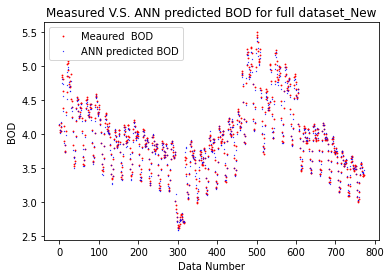

In [ ]:
# Time Series Plot for measured and predicted output
plt.figure()
plt.plot(y_train_New, 'ro',markersize=2, markevery=1, marker='h', markeredgecolor='black', markeredgewidth=0.0)
Ali = pd.Series(y_train_New_ANN)
Ali.index = y_train_New.index
plt.plot(Ali, 'b*',markersize=2, markevery=1, marker='*', markeredgecolor='black', markeredgewidth=0.0,linewidth=1)


plt.plot(y_test_New, 'ro',markersize=2, markevery=1, marker='h', markeredgecolor='black', markeredgewidth=0.0)
Ali = pd.Series(y_test_New_ANN)
Ali.index = y_test_New.index
plt.plot(Ali, 'b*',markersize=2, markevery=1, marker='*', markeredgecolor='black', markeredgewidth=0.0,linewidth=1)

plt.plot(y_valid_New, 'ro',markersize=2, markevery=1, marker='h', markeredgecolor='black', markeredgewidth=0.0, label='Meaured  '+ OutputName)
Ali = pd.Series(y_valid_New_ANN)
Ali.index = y_valid_New.index
plt.plot(Ali, 'b*',markersize=2, markevery=1, marker='*', markeredgecolor='black', markeredgewidth=0.0,linewidth=1, label='ANN predicted '+OutputName)

plt.title('Measured V.S. ANN predicted '+OutputName+ ' for full dataset_New')
plt.legend()
plt.xlabel("Data Number")
plt.ylabel(OutputName)
plt.savefig(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/Time series full Data.tif', format='tif', dpi=300)

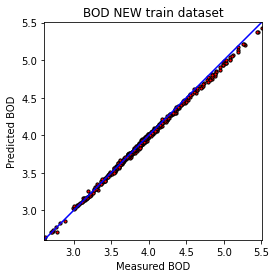

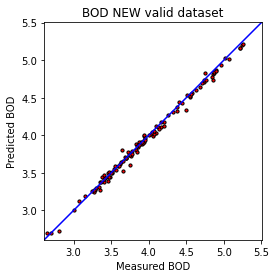

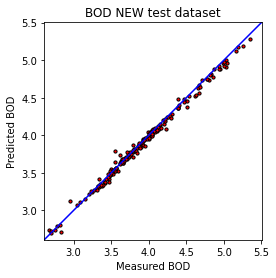

In [ ]:
# Scatter Plot for measured and predicted output
plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_train_New, y_train_New_ANN,color='red',marker= 'o',s=10,edgecolor='black',alpha=None,linewidths=1)
plt.xlabel('Measured '+OutputName)
plt.ylabel('Predicted '+OutputName)
lims = [y_train_New.min(), y_train_New.max()]
plt.xlim(lims)
plt.ylim(lims)
plt.title(OutputName+ ' NEW train dataset')
_ = plt.plot(lims, lims,color='blue')
plt.savefig(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/Scatter plot train Data.tif', format='tif', dpi=300)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_valid_New, y_valid_New_ANN,color='red',marker= 'o',s=10,edgecolor='black',alpha=None,linewidths=1)
plt.xlabel('Measured '+OutputName)
plt.ylabel('Predicted '+OutputName)
lims = [y_train_New.min(), y_train_New.max()]
plt.xlim(lims)
plt.ylim(lims)
plt.title(OutputName+ ' NEW valid dataset')
_ = plt.plot(lims, lims,color='blue')
plt.savefig(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/Scatter plot validation Data.tif', format='tif', dpi=300)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test_New, y_test_New_ANN,color='red',marker= 'o',s=10,edgecolor='black',alpha=None,linewidths=1)
plt.xlabel('Measured '+OutputName)
plt.ylabel('Predicted '+OutputName)
lims = [y_train_New.min(), y_train_New.max()]
plt.xlim(lims)
plt.ylim(lims)
plt.title(OutputName+ ' NEW test dataset')
_ = plt.plot(lims, lims,color='blue')
plt.savefig(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/Scatter plot test Data.tif', format='tif', dpi=300)